In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import MinMaxScaler

In [2]:
DATA_FOLDER = 'dataset'
DATASET = os.path.join(DATA_FOLDER, 'outliers_labelled.csv')

In [3]:
df = pd.read_csv(DATASET)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]

normalized_df = MinMaxScaler().fit_transform(df[numerical_attr_list].values)

In [4]:
df['is_outlier_vc_abod']

0       False
1       False
2       False
3       False
4       False
        ...  
2447    False
2448    False
2449    False
2450    False
2451    False
Name: is_outlier_vc_abod, Length: 2452, dtype: bool

In [5]:
def plot_outliers_in_embedding(embedding, attr='sex', top1pct=False):

    feature = 'vocal_channel' if attr == 'vc' else attr

    if top1pct:
        df_outliers_lof = df.loc[df[f'is_outlier_{attr}_lof'] == True]
        df_outliers_isfo = df.loc[df[f'is_outlier_{attr}_isfo'] == True]
        df_outliers_abod = df.loc[df[f'is_outlier_{attr}_abod'] == True]

        scores_lof = df_outliers_lof[f'outlier_score_{attr}_lof']
        scores_isfo = df_outliers_isfo[f'outlier_score_{attr}_isfo']
        scores_abod = df_outliers_abod[f'outlier_score_{attr}_abod']

        one_percent = int(df.shape[0] / 100)
        top1pct_outliers_lof = scores_lof.nsmallest(one_percent)
        top1pct_outliers_isfo = scores_isfo.nsmallest(one_percent)
        top1pct_outliers_abod = scores_abod.nlargest(one_percent)


    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 8), dpi=100)

    for ax in axes.flatten():
        ax.axis("off")

    axabod, axlof, axisfo, _ = axes.flatten()
    methods = [s.format(cat=attr) for s in ["is_outlier_{cat}_abod",
                                             "is_outlier_{cat}_lof",
                                             "is_outlier_{cat}_isfo"]
               ]

    for ax, method in zip([axabod, axlof, axisfo], methods):
        ax.scatter(*embedding.T, c=pd.Categorical(df[feature]).codes, cmap='winter', s=10)

        if top1pct:
            if method == f'is_outlier_{attr}_abod':
                top1pct_indices_abod = df.index.isin(top1pct_outliers_abod.index)
                ax.scatter(*(embedding[top1pct_indices_abod]).T, marker='x', color='red', s=8)
            elif method == f'is_outlier_{attr}_lof':
                top1pct_indices_lof = df.index.isin(top1pct_outliers_lof.index)
                ax.scatter(*(embedding[top1pct_indices_lof]).T, marker='x', color='red', s=8)
            elif method == f'is_outlier_{attr}_isfo':
                top1pct_indices_isfo = df.index.isin(top1pct_outliers_isfo.index)
                ax.scatter(*(embedding[top1pct_indices_isfo]).T, marker='x', color='red', s=8)

        else:
            ax.scatter(*(embedding[df[method].values]).T, marker='x', color='red', s=8)

        ax.set_title(method)
    return fig, axes

(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_vc_abod'}>,
         <Axes: title={'center': 'is_outlier_vc_lof'}>],
        [<Axes: title={'center': 'is_outlier_vc_isfo'}>, <Axes: >]],
       dtype=object))

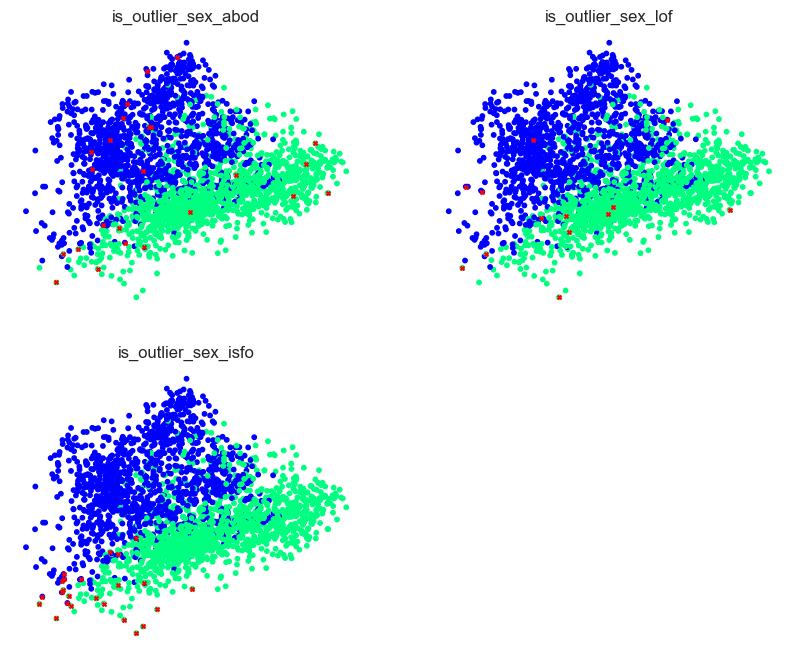

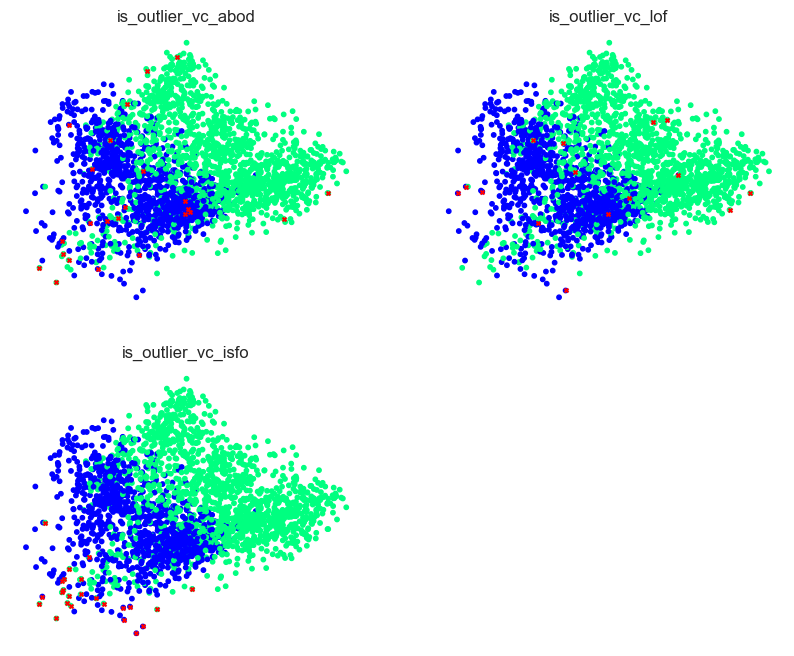

In [6]:
from sklearn.decomposition import PCA

res = PCA(n_components=2)
embedding = res.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, attr='sex', top1pct=True)
plot_outliers_in_embedding(embedding, attr='vc', top1pct=True)

/Users/paolomollica/Desktop/DM2/venv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/paolomollica/Desktop/DM2/venv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/paolomollica/Desktop/DM2/venv/lib/python3.9/site-packages/uma

(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_vc_abod'}>,
         <Axes: title={'center': 'is_outlier_vc_lof'}>],
        [<Axes: title={'center': 'is_outlier_vc_isfo'}>, <Axes: >]],
       dtype=object))

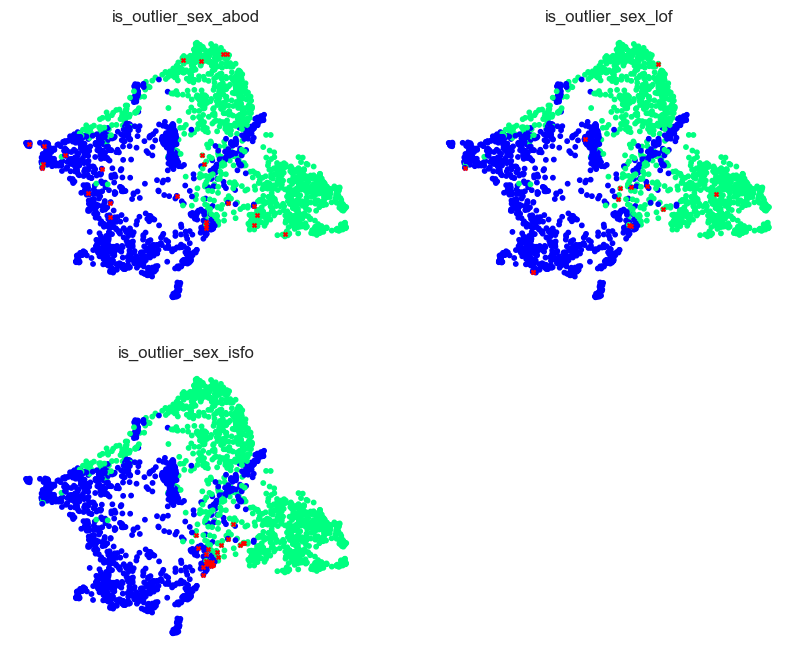

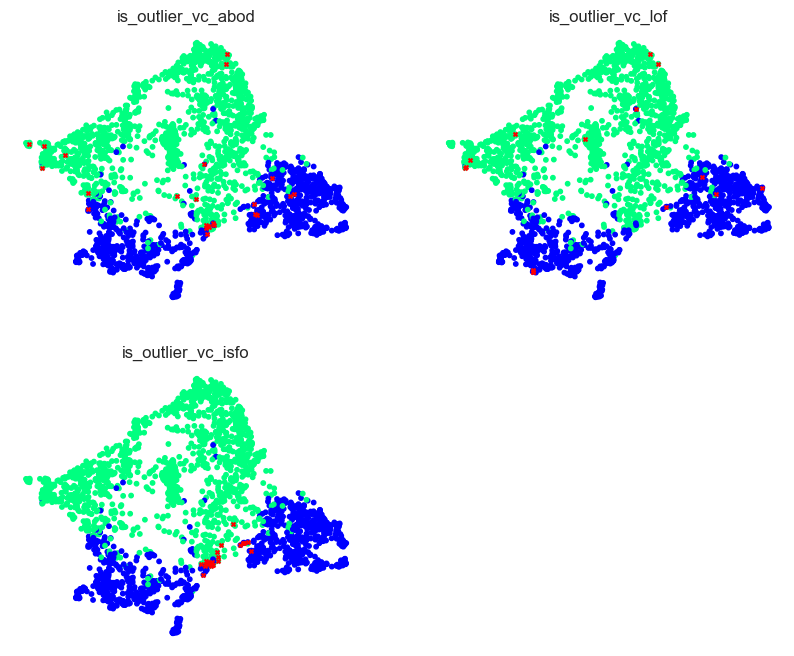

In [7]:
import umap

reducer = umap.UMAP(n_components=2, n_neighbors=50)
embedding = reducer.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, attr='sex', top1pct=True)
plot_outliers_in_embedding(embedding, attr='vc', top1pct=True)

(<Figure size 1000x800 with 4 Axes>,
 array([[<Axes: title={'center': 'is_outlier_vc_abod'}>,
         <Axes: title={'center': 'is_outlier_vc_lof'}>],
        [<Axes: title={'center': 'is_outlier_vc_isfo'}>, <Axes: >]],
       dtype=object))

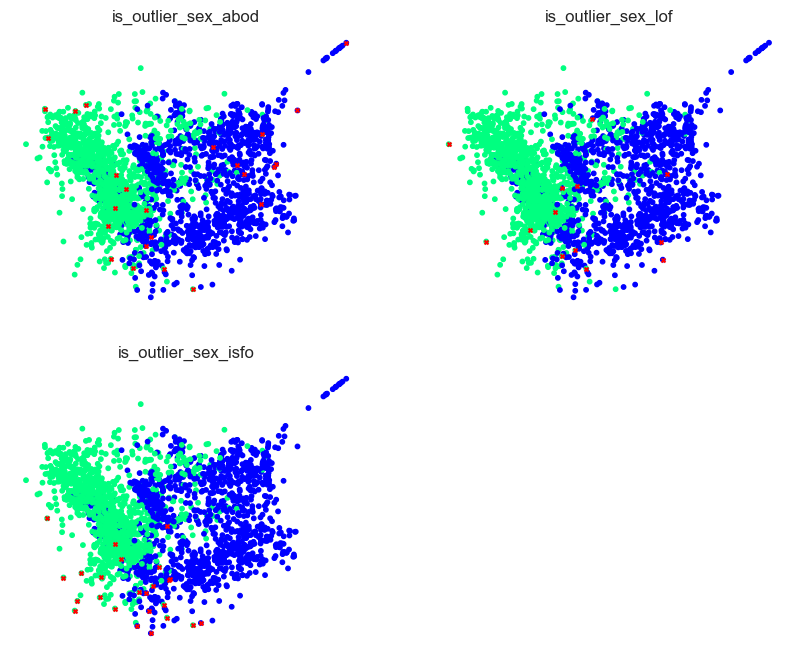

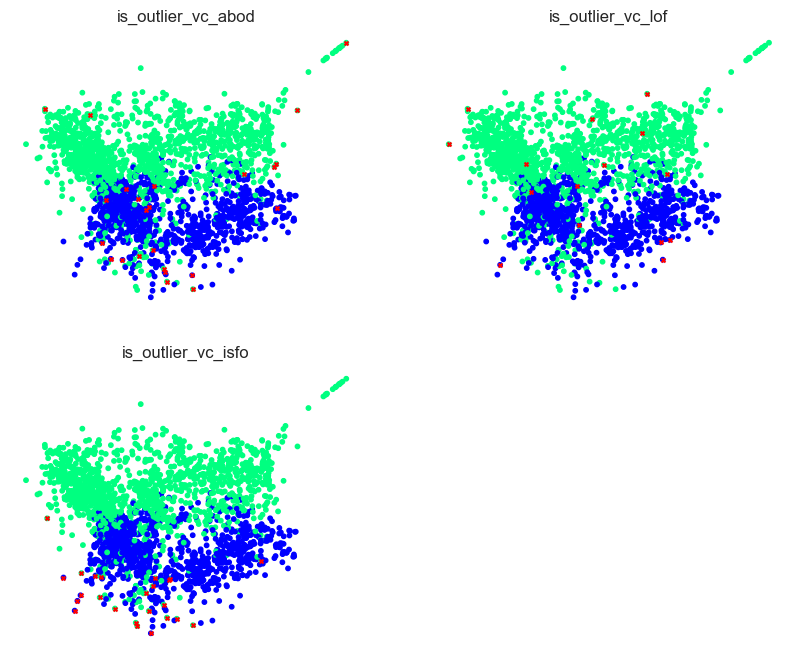

In [8]:
from sklearn.manifold import Isomap

reducer = Isomap(n_components=2, n_neighbors=6)
embedding = reducer.fit_transform(normalized_df)

plot_outliers_in_embedding(embedding, attr='sex', top1pct=True)
plot_outliers_in_embedding(embedding, attr='vc', top1pct=True)